In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

In [3]:
housing_data = pd.read_csv(r'C:\Users\abrde\Desktop\USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housing_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
le = LabelEncoder()

In [6]:
housing_data['Address'] = le.fit_transform(housing_data['Address'])

In [7]:
housing_data['Avg. Area Income'] = le.fit_transform(housing_data['Avg. Area Income'])
housing_data['Avg. Area House Age'] = le.fit_transform(housing_data['Avg. Area House Age'])
housing_data['Avg. Area Number of Rooms'] = le.fit_transform(housing_data['Avg. Area Number of Rooms'])
housing_data['Avg. Area Number of Bedrooms'] = le.fit_transform(housing_data['Avg. Area Number of Bedrooms'])
housing_data['Price'] = le.fit_transform(housing_data['Price'])
housing_data['Area Population'] = le.fit_transform(housing_data['Area Population'])

In [8]:
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,4253,1942,2512,111,468,1563,962
1,4223,2565,1972,60,3274,3890,863
2,1221,2298,4689,166,2642,1562,4069
3,1572,4446,412,77,2122,2671,4794
4,1037,854,3992,125,827,225,4736


In [10]:

y = np.array(housing_data['Price'])
y

array([1563, 3890, 1562, ..., 1411, 2308, 2879], dtype=int64)

In [11]:
y = y.reshape(-1,1)

In [12]:
y.shape

(5000, 1)

In [13]:
X = housing_data['Avg. Area Number of Rooms']
X.head()

0    2512
1    1972
2    4689
3     412
4    3992
Name: Avg. Area Number of Rooms, dtype: int64

In [14]:
X = np.array(X).reshape(-1,1)
X.shape

(5000, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [16]:
len(X_train)

3000

In [17]:
len(X_test)

2000

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(3000, 1)

In [21]:
X_test.shape

(2000, 1)

In [22]:
linear = LinearRegression()

In [23]:
linear.fit(X_train, y_train)

LinearRegression()

In [24]:
linear.intercept_

array([2522.47066667])

In [25]:
linear.coef_

array([[465.77017431]])

In [26]:
linear.predict([[2512]])

array([[1172537.14852795]])

In [27]:
print("y=mx+c")

y=mx+c


In [30]:
486.63346823*2512

1222423.27219376

In [32]:
print("predict x")

predict x


In [31]:
linear.predict(X_test)

array([[1924.58358963],
       [1963.00019359],
       [2440.78652853],
       ...,
       [2493.08476249],
       [2076.31303383],
       [2908.88800533]])

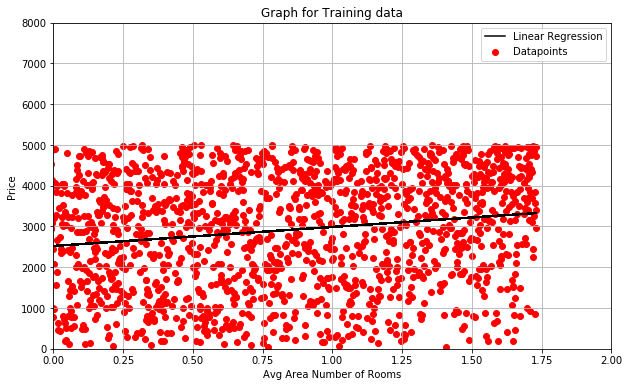

In [33]:

plt.figure(figsize = (10,6))

plt.scatter(X_train, y_train, color = 'red', label = 'Datapoints')
plt.plot(X_test, linear.predict(X_test), color = 'black', label = 'Linear Regression')

plt.xlim(0,2)
plt.ylim(0,8000)

plt.xlabel('Avg Area Number of Rooms')
plt.ylabel('Price')

plt.grid(True)

plt.title('Graph for Training data')

plt.legend()

plt.style.use('fivethirtyeight')

In [36]:
print("x-y graph")

x-y graph


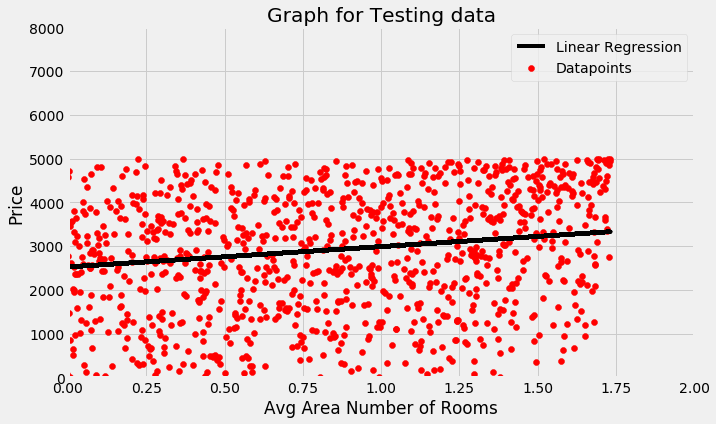

In [37]:
plt.figure(figsize = (10,6))

plt.scatter(X_test, y_test, color = 'red', label = 'Datapoints')
plt.plot(X_test, linear.predict(X_test), color = 'black', label = 'Linear Regression')

plt.xlim(0,2)
plt.ylim(0,8000)

plt.xlabel('Avg Area Number of Rooms')
plt.ylabel('Price')

plt.grid(True)

plt.title('Graph for Testing data')

plt.legend()

plt.style.use('fivethirtyeight')